## ------------------------- JABODETABEK HOUSE PRICE -------------------------

### By
1. Nurul Amira
2. Lila Nurrohmah
3. Lazarus
4. Lisa Iha Rodiah
5. Fajar Hajadil Fitra

### Dataset diambil dari website Kaggle tentang Daftar Harga Rumah di Jabodetabek
###### Daftar harga rumah tersebut diambil dari salah satu web listing di Indonesia (website rumah123.com)
Link Kaggle: https://www.kaggle.com/datasets/nafisbarizki/daftar-harga-rumah-jabodetabek

In [1]:
# import package
import numpy as np
import pandas as pd
# import libraries untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
from jcopml.plot import plot_missing_value
from plotly.graph_objs import Scattermapbox, Layout, Figure
import plotly.express as px

In [2]:
# menampilkan data yang digunakan
df = pd.read_csv('jabodetabek_house_price.csv')
df.head()

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,...,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,...,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,...,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,...,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,...,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished


# PREPROCESSING DATA 1

In [3]:
# menampilkan info dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   float64
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   float64
 7   long                  3553 non-null   float64
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64
 14  building_size_m2      3551 non-null   float64
 15  carports             

Data yang digunakan memiliki 14 kolom dengan tipe numerikal dan 13 kolom dengan tipe kategorikal.

In [4]:
# menampilkan jumlah data yang kosong pada setiap tabel
df.isna().sum()

url                        0
price_in_rp                0
title                      0
address                    0
district                   0
city                       0
lat                        0
long                       0
facilities                 0
property_type              1
ads_id                     4
bedrooms                  34
bathrooms                 29
land_size_m2               2
building_size_m2           2
carports                   0
certificate              141
electricity                0
maid_bedrooms              0
maid_bathrooms             0
floors                     6
building_age            1445
year_built              1445
property_condition       246
building_orientation    1647
garages                    0
furnishing               387
dtype: int64

Masih terdapat beberapa data yang NaN pada beberapa tabel

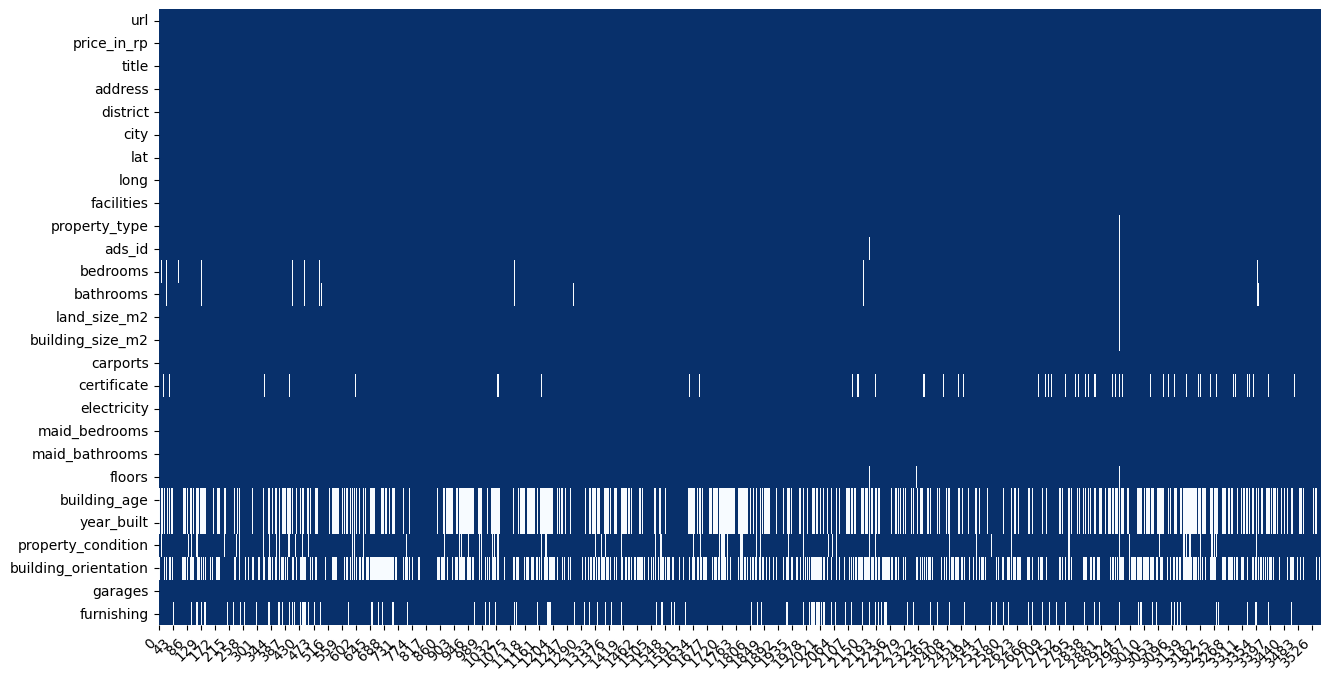

In [5]:
# visualisasi letak data NaN
plot_missing_value(df)

### Imputasi data dengan tipe numerikal yang kosong dengan nilai rata-rata

In [6]:
# imputasi data numerikal
df['bedrooms']=df['bedrooms'].fillna(df['bedrooms'].median())
df['bathrooms']=df['bathrooms'].fillna(df['bathrooms'].median())
df['floors']=df['floors'].fillna(df['floors'].median())
df['garages']=df['garages'].fillna(df['garages'].median())
df['land_size_m2']=df['land_size_m2'].fillna(df['land_size_m2'].median())
df['building_size_m2']=df['building_size_m2'].fillna(df['building_size_m2'].median())

Data numerikal kosong yang diisi dengan nilai median (kamar, kamar mandi, lantai, garasi, luas tanah, dan luas bangunan).
Nilai median dapat digunakan untuk mengisi data dalam bentuk numerikal, jika data memiliki nilai pencilan (outlier).

### Mengubah data tipe float menjadi integer

In [7]:
# mengubah data bentuk float ke integer
df['bedrooms'] = df['bedrooms'].astype('int')
df['bathrooms']=df['bathrooms'].astype('int')
df['floors']=df['floors'].astype('int')
df['garages']=df['garages'].astype('int')
df['carports']=df['carports'].astype('int')
df['maid_bedrooms']=df['maid_bedrooms'].astype('int')
df['maid_bathrooms']=df['maid_bathrooms'].astype('int')

Beberapa data yang digunakan masih dalam bentuk desimal, oleh karena itu perlu diubah dalam bentuk bilangan bulat.

### Imputasi data dengan tipe numerikal yang kosong dengan nilai modus

In [8]:
# imputasi data kategorikal
df['certificate']=df['certificate'].fillna(df['certificate'].mode()[0])
df['property_type']=df['property_type'].fillna(df['property_type'].mode()[0])
df['property_condition']=df['property_condition'].fillna(df['property_condition'].mode()[0])
df['furnishing']=df['furnishing'].fillna(df['furnishing'].mode()[0])

Data kategorikal kosong yang diisi dengan modus (nilai yang sering muncul).
Data yang akan diisi dengan modus adalah data ceritificate, property type, property condition, dan furnishing.
Nilai modus dapat digunakan untuk mengisi data dalam bentuk kategorikal.

### Mengubah data electricity tipe kategorikal menjadi numerikal

In [9]:
# memisahkan angka dengan mah pada kolom electricity dengan metode spliting
df[['electricity', 'mah']] = df['electricity'].str.split(' ',n=1, expand=True)

In [10]:
# mengubah data yang kosong pada kolom electricity menjadi NaN 
df['electricity'] = df['electricity'].replace(r'^([A-Za-z]|_)+$', np.NaN, regex=True)
# mengubah data bentuk kategorikal ke numerikal integer
df['electricity'] = df['electricity'].astype('float')
df['electricity']=df['electricity'].fillna(int(df['electricity'].median()))
df['electricity'] = df['electricity'].astype('int')

### Menghapus kolom yang tidak dimasukkan dalam visualisasi

In [11]:
# drop variable
df.drop(['url','title','address','ads_id','year_built','building_age','building_orientation','mah'],axis=1,inplace=True)

In [12]:
# menampilkan jumlah data yang kosong pada setiap tabel
df.isna().sum()

price_in_rp           0
district              0
city                  0
lat                   0
long                  0
facilities            0
property_type         0
bedrooms              0
bathrooms             0
land_size_m2          0
building_size_m2      0
carports              0
certificate           0
electricity           0
maid_bedrooms         0
maid_bathrooms        0
floors                0
property_condition    0
garages               0
furnishing            0
dtype: int64

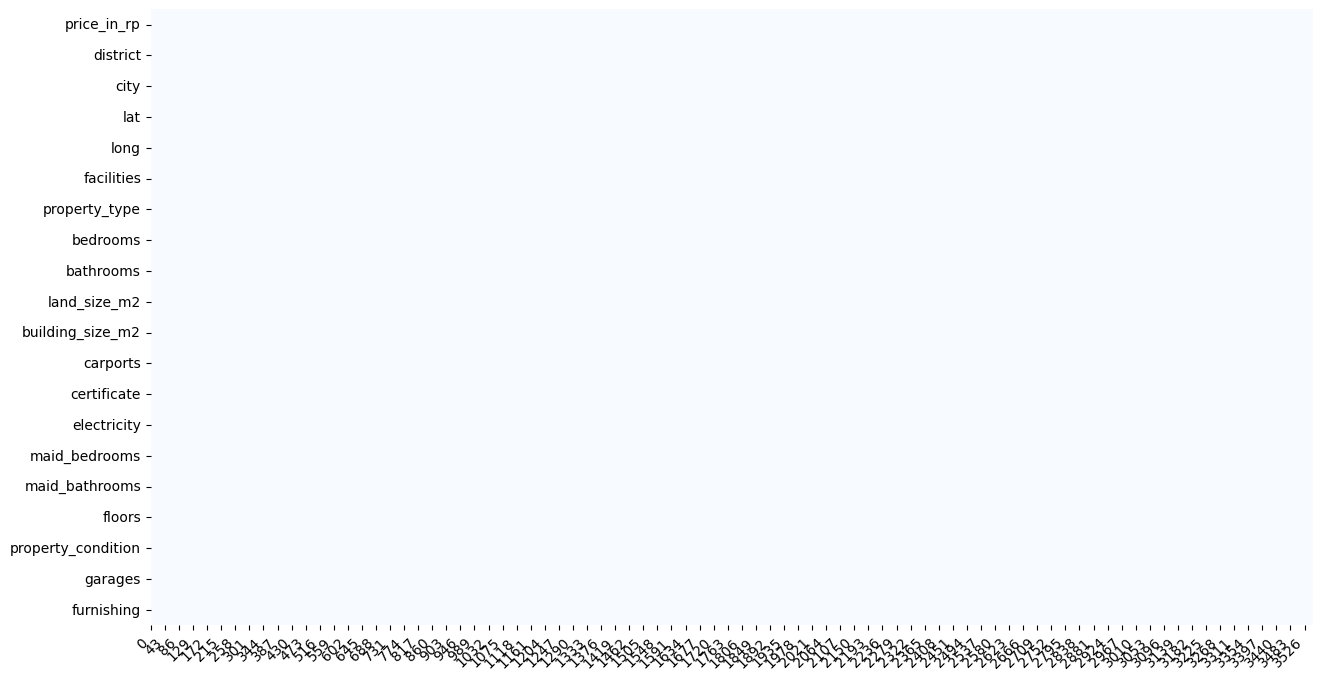

In [13]:
# visualisasi letak data NaN
plot_missing_value(df)

In [14]:
# menampilkan dataset hasil data preparation 1
df.head()

,price_in_rp,district,city,lat,long,facilities,property_type,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,certificate,electricity,maid_bedrooms,maid_bathrooms,floors,property_condition,garages,furnishing
0,2.990000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,4,4,239.0,272.0,0,shm - sertifikat hak milik,4400,0,1,2,bagus,0,unfurnished
1,1.270000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,3,2,55.0,69.0,1,hgb - hak guna bangunan,2200,0,0,2,bagus,0,unfurnished
2,1.950000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,3,3,119.0,131.0,1,hgb - hak guna bangunan,2200,1,1,2,bagus,1,unfurnished
3,3.300000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,3,3,180.0,174.0,0,shm - sertifikat hak milik,3500,1,1,2,bagus sekali,2,unfurnished
4,4.500000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,4,3,328.0,196.0,2,shm - sertifikat hak milik,3500,1,1,2,bagus,1,unfurnished


### Menentukan nilai pencilan

In [15]:
# menampilkan ringkasan statistik dataset
df.describe()

,price_in_rp,lat,long,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,electricity,maid_bedrooms,maid_bathrooms,floors,garages
count,3.553000e+03,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000
mean,4.191685e+09,-6.324721,106.792881,3.323389,2.619758,204.752322,186.545455,1.197861,3081.030115,0.496482,0.370391,1.764987,0.708978
std,1.375067e+10,0.129245,0.172159,2.659518,2.686055,402.021078,248.379819,1.114996,3136.708535,0.685723,0.536024,0.636884,1.311879
min,4.200000e+07,-6.894828,106.402315,1.000000,1.000000,12.000000,1.000000,0.000000,450.000000,0.000000,0.000000,1.000000,0.000000
25%,8.000000e+08,-6.397933,106.687295,2.000000,2.000000,75.000000,66.000000,1.000000,2200.000000,0.000000,0.000000,1.000000,0.000000
50%,1.500000e+09,-6.300733,106.799954,3.000000,2.000000,108.000000,112.000000,1.000000,2200.000000,0.000000,0.000000,2.000000,0.000000
75%,3.590000e+09,-6.231754,106.874766,4.000000,3.000000,192.000000,208.000000,2.000000,3500.000000,1.000000,1.000000,2.000000,1.000000
max,5.800000e+11,-6.102478,109.771691,99.000000,99.000000,8000.000000,6000.000000,15.000000,53000.000000,7.000000,5.000000,5.000000,50.000000


### Menghapus nilai pencilan (outliers)

#### Menghapus nilai outliers pada kolom proce_in_rp

In [16]:
# menampilkan ringkasan statistik price_in_rp
df.price_in_rp.describe()

count    3.553000e+03
mean     4.191685e+09
std      1.375067e+10
min      4.200000e+07
25%      8.000000e+08
50%      1.500000e+09
75%      3.590000e+09
max      5.800000e+11
Name: price_in_rp, dtype: float64

In [17]:
def calculate_percentiles(data):
    # menghitung persentil ke-5 dan ke-95 menggunakan numpy
    percentile_5 = np.percentile(data, 5)
    percentile_95 = np.percentile(data, 95)
    return percentile_5, percentile_95

# memilih data yang ingin dilihat nilai p5 dan p95
data = df['price_in_rp']
p5, p95 = calculate_percentiles(data)

# menampilkan hasil persentil ke-5 dan ke-95
print("Persentil 5: ", p5)
print("Persentil 95: ", p95)

Persentil 5:  400000000.0
Persentil 95:  15500000000.0


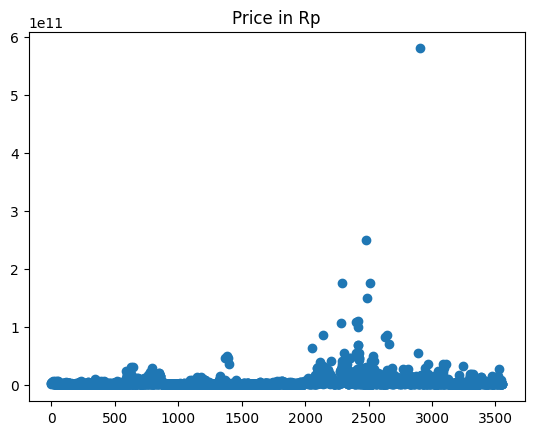

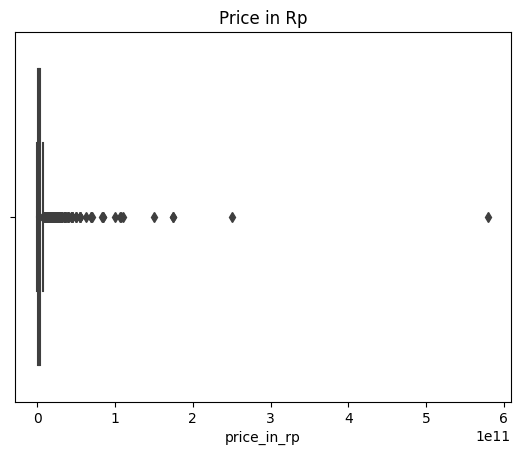

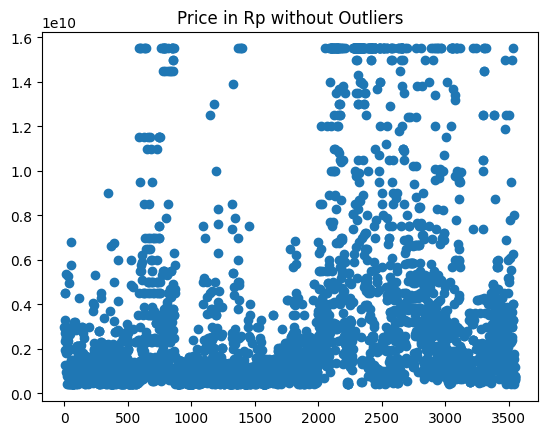

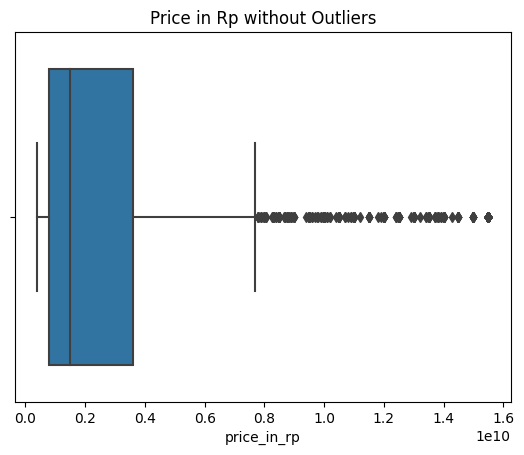

In [18]:
# visualisasi scatter untuk menampilkan data outliers
plt.scatter(df.price_in_rp.index, df.price_in_rp)
plt.title('Price in Rp')
plt.show()

# visualisasi boxplot untuk menampilkan data outliers
sns.boxplot(x=df.price_in_rp)
plt.title('Price in Rp')
plt.show()

# memotong data outliers dengan metode winsorize
import scipy
from scipy.stats.mstats import winsorize
df.price_in_rp = winsorize(df.price_in_rp,(0.05,0.05),inplace=True)

# visualisasi scatter untuk menampilkan data outliers setelah dibersihkan
plt.scatter(df.price_in_rp.index,df.price_in_rp)
plt.title('Price in Rp without Outliers')
plt.show()

# visualisasi boxplot untuk menampilkan data outliers setelah dibersihkan
sns.boxplot(x= df.price_in_rp)
plt.title('Price in Rp without Outliers')
plt.show()

#### Menghapus ouliers pada kolom bedrooms

In [19]:
# menampilkan ringkasan statistik bedrooms
df.bedrooms.describe()

count    3553.000000
mean        3.323389
std         2.659518
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        99.000000
Name: bedrooms, dtype: float64

In [20]:
def calculate_percentiles(data):
    # menghitung persentil ke-5 dan ke-95 menggunakan numpy
    percentile_5 = np.percentile(data, 5)
    percentile_95 = np.percentile(data, 95)
    return percentile_5, percentile_95

# memilih data yang ingin dilihat nilai p5 dan p95
data = df['bedrooms']
p5, p95 = calculate_percentiles(data)

# menampilkan hasil persentil ke-5 dan ke-95
print("Persentil 5: ", p5)
print("Persentil 95: ", p95)

Persentil 5:  2.0
Persentil 95:  5.0


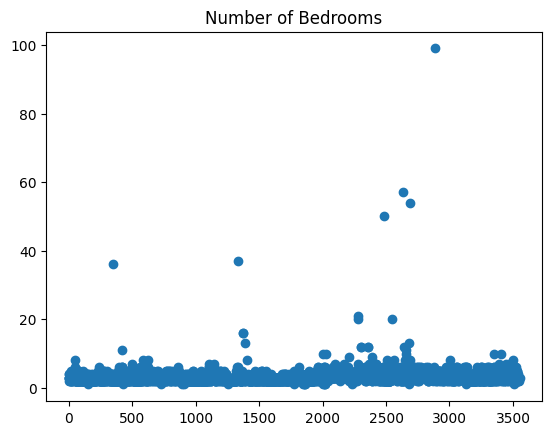

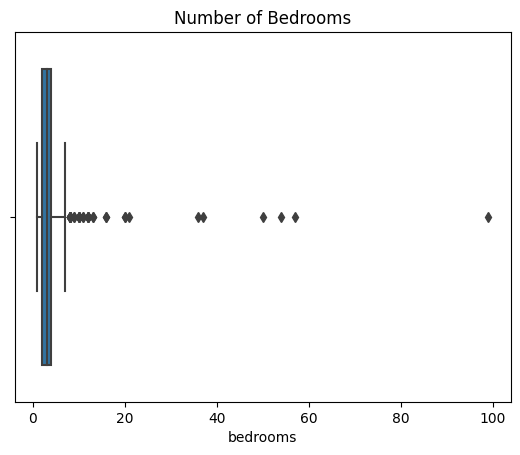

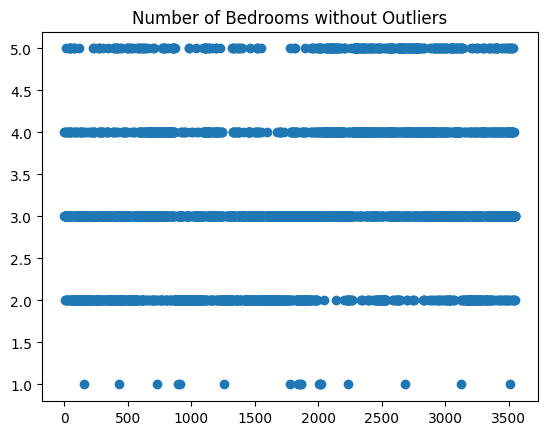

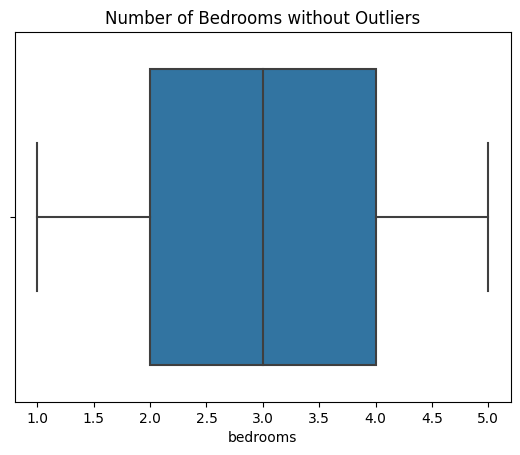

In [21]:
# visualisasi scatter untuk menampilkan data outliers
plt.scatter(df.bedrooms.index, df.bedrooms)
plt.title('Number of Bedrooms')
plt.show()

# visualisasi boxplot untuk menampilkan data outliers
sns.boxplot(x=df.bedrooms)
plt.title('Number of Bedrooms')
plt.show()

# memotong data outliers dengan metode winsorize
import scipy
from scipy.stats.mstats import winsorize
df.bedrooms = winsorize(df.bedrooms,(0.00,0.05),inplace=True)

# visualisasi scatter untuk menampilkan data outliers setelah dibersihkan
plt.scatter(df.bedrooms.index,df.bedrooms)
plt.title('Number of Bedrooms without Outliers')
plt.show()

# visualisasi boxplot untuk menampilkan data outliers setelah dibersihkan
sns.boxplot(x= df.bedrooms)
plt.title('Number of Bedrooms without Outliers')
plt.show()

#### Menghapus ouliers pada kolom bathrooms

In [22]:
# menampilkan ringkasan statistik bathrooms
df.bathrooms.describe()

count    3553.000000
mean        2.619758
std         2.686055
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        99.000000
Name: bathrooms, dtype: float64

In [23]:
def calculate_percentiles(data):
    # menghitung persentil ke-5 dan ke-95 menggunakan numpy
    percentile_5 = np.percentile(data, 5)
    percentile_95 = np.percentile(data, 95)
    return percentile_5, percentile_95

# memilih data yang ingin dilihat nilai p5 dan p95
data = df['bathrooms']
p5, p95 = calculate_percentiles(data)

# menampilkan hasil persentil ke-5 dan ke-95
print("Persentil 5: ", p5)
print("Persentil 95: ", p95)

Persentil 5:  1.0
Persentil 95:  5.0


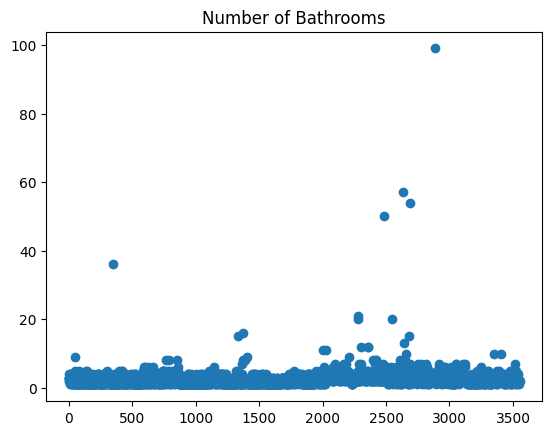

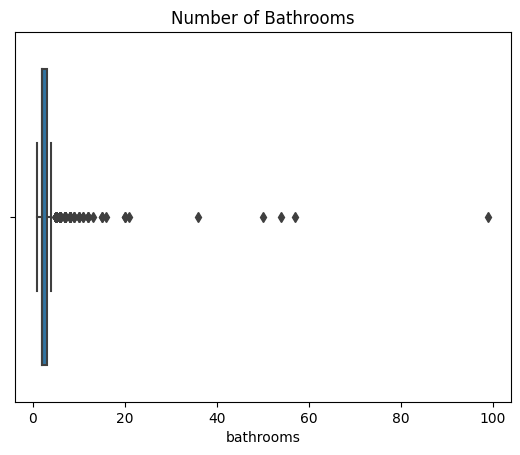

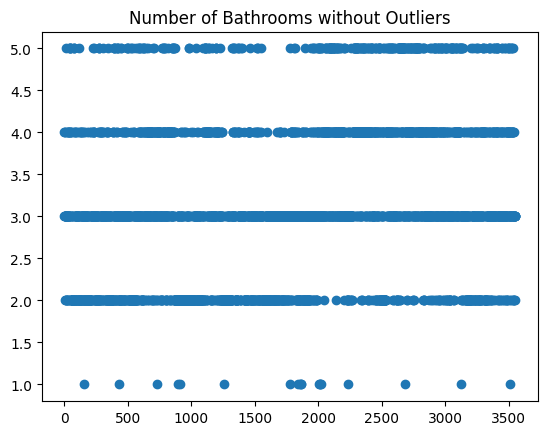

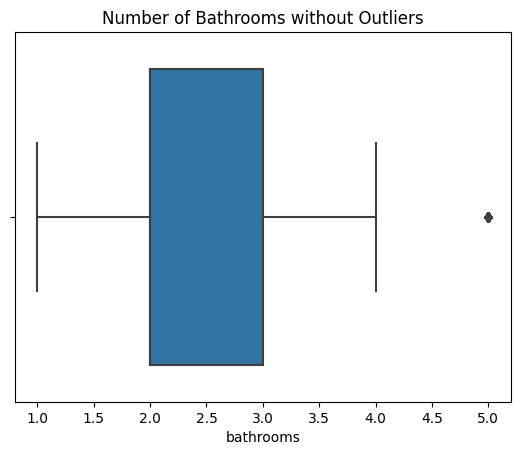

In [24]:
# visualisasi scatter untuk menampilkan data outliers
plt.scatter(df.bathrooms.index, df.bathrooms)
plt.title('Number of Bathrooms')
plt.show()

# visualisasi boxplot untuk menampilkan data outliers
sns.boxplot(x=df.bathrooms)
plt.title('Number of Bathrooms')
plt.show()

# memotong data outliers dengan metode winsorize
import scipy
from scipy.stats.mstats import winsorize
df.bathrooms = winsorize(df.bathrooms,(0.00,0.05),inplace=True)

# visualisasi scatter untuk menampilkan data outliers setelah dibersihkan
plt.scatter(df.bathrooms.index,df.bedrooms)
plt.title('Number of Bathrooms without Outliers')
plt.show()

# visualisasi boxplot untuk menampilkan data outliers setelah dibersihkan
sns.boxplot(x= df.bathrooms)
plt.title('Number of Bathrooms without Outliers')
plt.show()

#### Menghapus ouliers pada kolom land_size_m2

In [25]:
# menampilkan ringkasan statistik land_size_m2
df.land_size_m2.describe()

count    3553.000000
mean      204.752322
std       402.021078
min        12.000000
25%        75.000000
50%       108.000000
75%       192.000000
max      8000.000000
Name: land_size_m2, dtype: float64

In [26]:
def calculate_percentiles(data):
    # menghitung persentil ke-5 dan ke-95 menggunakan numpy
    percentile_5 = np.percentile(data, 5)
    percentile_95 = np.percentile(data, 95)
    return percentile_5, percentile_95

# memilih data yang ingin dilihat nilai p5 dan p95
data = df['land_size_m2']
p5, p95 = calculate_percentiles(data)

# menampilkan hasil persentil ke-5 dan ke-95
print("Persentil 5: ", p5)
print("Persentil 95: ", p95)

Persentil 5:  55.0
Persentil 95:  585.0


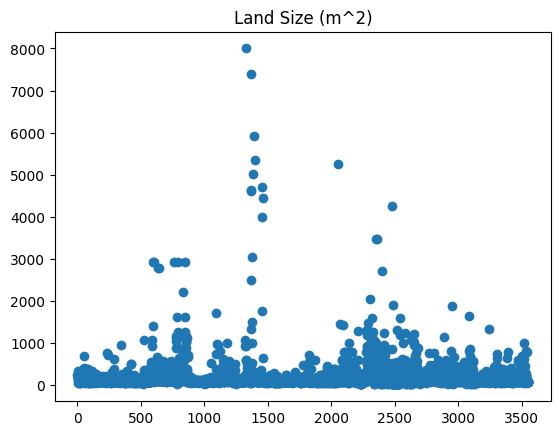

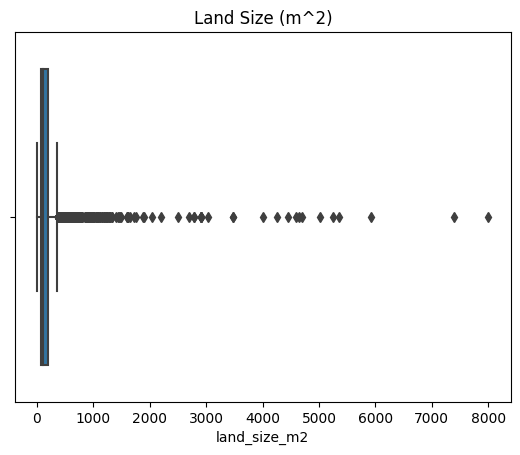

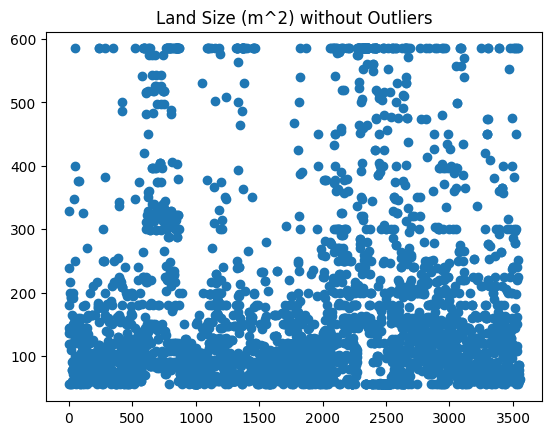

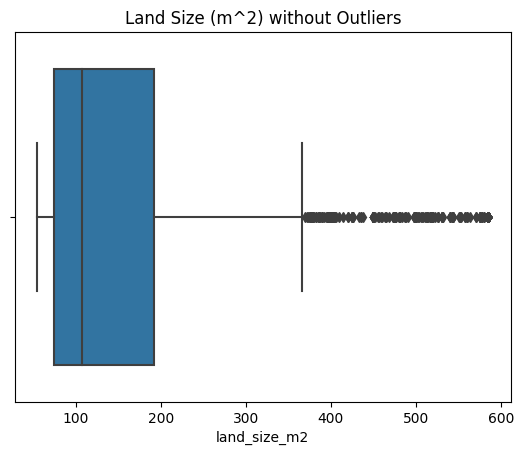

In [27]:
# visualisasi scatter untuk menampilkan data outliers
plt.scatter(df.land_size_m2.index, df.land_size_m2)
plt.title('Land Size (m^2)')
plt.show()

# visualisasi boxplot untuk menampilkan data outliers
sns.boxplot(x=df.land_size_m2)
plt.title('Land Size (m^2)')
plt.show()

# memotong data outliers dengan metode winsorize
import scipy
from scipy.stats.mstats import winsorize
df.land_size_m2 = winsorize(df.land_size_m2,(0.05,0.05),inplace=True)

# visualisasi scatter untuk menampilkan data outliers setelah dibersihkan
plt.scatter(df.land_size_m2.index,df.land_size_m2)
plt.title('Land Size (m^2) without Outliers')
plt.show()

# visualisasi boxplot untuk menampilkan data outliers setelah dibersihkan
sns.boxplot(x= df.land_size_m2)
plt.title('Land Size (m^2) without Outliers')
plt.show()

#### Menghapus ouliers pada kolom building_size_m2

In [28]:
# menampilkan ringkasan statistik building_size_m2
df.building_size_m2.describe()

count    3553.000000
mean      186.545455
std       248.379819
min         1.000000
25%        66.000000
50%       112.000000
75%       208.000000
max      6000.000000
Name: building_size_m2, dtype: float64

In [29]:
def calculate_percentiles(data):
    # menghitung persentil ke-5 dan ke-95 menggunakan numpy
    percentile_5 = np.percentile(data, 5)
    percentile_95 = np.percentile(data, 95)
    return percentile_5, percentile_95

# memilih data yang ingin dilihat nilai p5 dan p95
data = df['building_size_m2']
p5, p95 = calculate_percentiles(data)

# menampilkan hasil persentil ke-5 dan ke-95
print("Persentil 5: ", p5)
print("Persentil 95: ", p95)

Persentil 5:  36.0
Persentil 95:  550.0


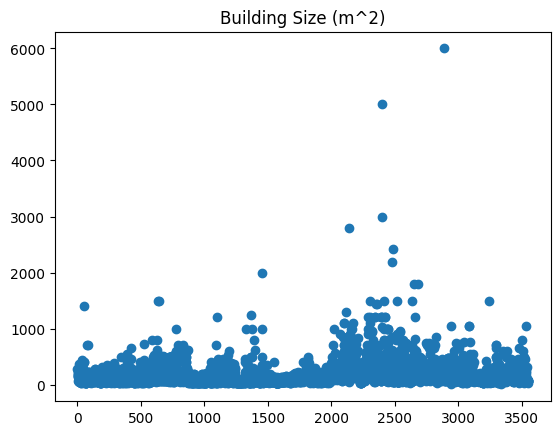

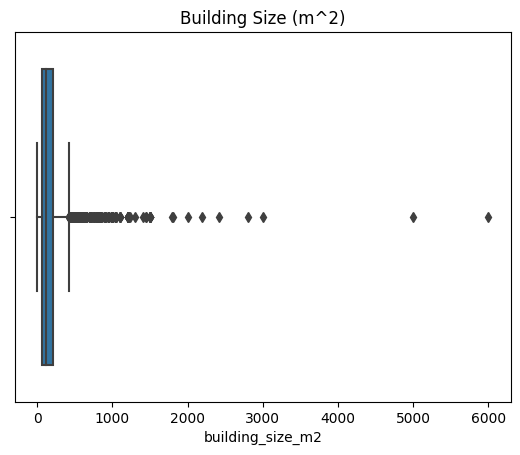

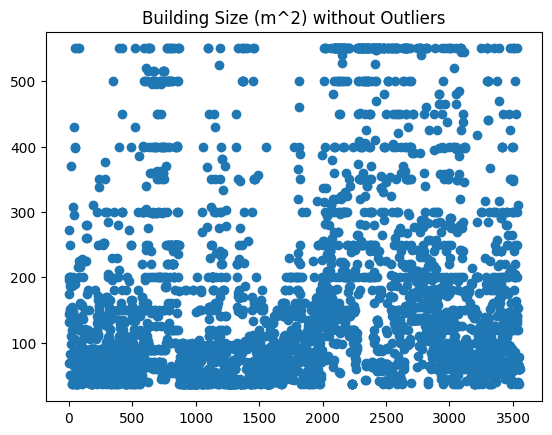

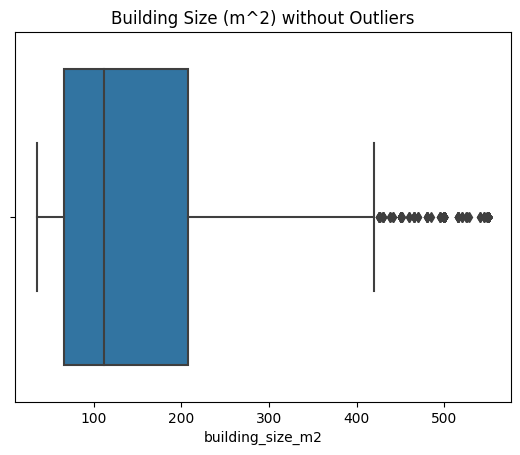

In [30]:
# visualisasi scatter untuk menampilkan data outliers
plt.scatter(df.building_size_m2.index, df.building_size_m2)
plt.title('Building Size (m^2)')
plt.show()

# visualisasi boxplot untuk menampilkan data outliers
sns.boxplot(x=df.building_size_m2)
plt.title('Building Size (m^2)')
plt.show()

# memotong data outliers dengan metode winsorize
import scipy
from scipy.stats.mstats import winsorize
df.building_size_m2 = winsorize(df.building_size_m2,(0.05,0.05),inplace=True)

# visualisasi scatter untuk menampilkan data outliers setelah dibersihkan
plt.scatter(df.building_size_m2.index,df.building_size_m2)
plt.title('Building Size (m^2) without Outliers')
plt.show()

# visualisasi boxplot untuk menampilkan data outliers setelah dibersihkan
sns.boxplot(x= df.building_size_m2)
plt.title('Building Size (m^2) without Outliers')
plt.show()

In [31]:
# menampilkan ringkasan statistik carports
df.carports.describe()

count    3553.000000
mean        1.197861
std         1.114996
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        15.000000
Name: carports, dtype: float64

In [32]:
def calculate_percentiles(data):
    # menghitung persentil ke-5 dan ke-95 menggunakan numpy
    percentile_5 = np.percentile(data, 5)
    percentile_95 = np.percentile(data, 95)
    return percentile_5, percentile_95

# memilih data yang ingin dilihat nilai p5 dan p95
data = df['carports']
p5, p95 = calculate_percentiles(data)

# menampilkan hasil persentil ke-5 dan ke-95
print("Persentil 5: ", p5)
print("Persentil 95: ", p95)

Persentil 5:  0.0
Persentil 95:  3.0


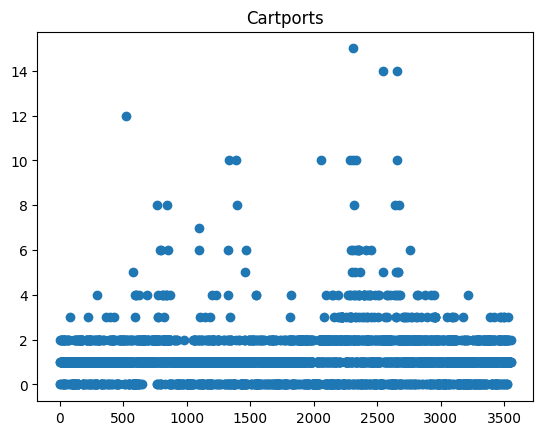

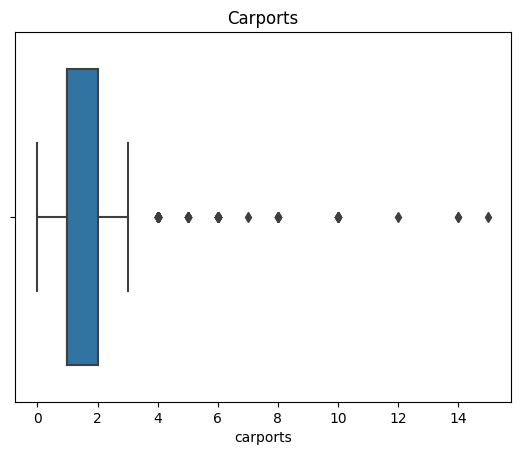

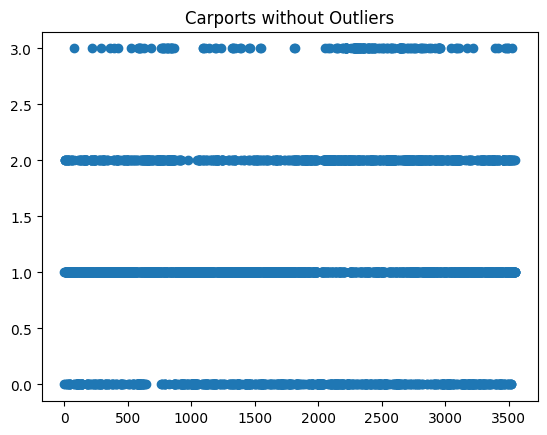

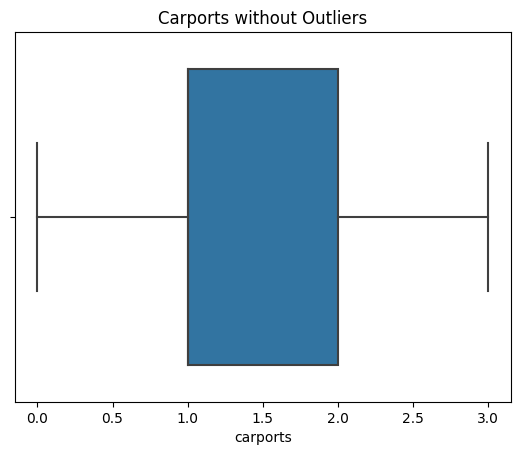

In [33]:
# visualisasi scatter untuk menampilkan data outliers
plt.scatter(df.carports.index, df.carports)
plt.title('Cartports')
plt.show()

# visualisasi boxplot untuk menampilkan data outliers
sns.boxplot(x=df.carports)
plt.title('Carports')
plt.show()

# memotong data outliers dengan metode winsorize
import scipy
from scipy.stats.mstats import winsorize
df.carports = winsorize(df.carports,(0.00,0.05),inplace=True)

# visualisasi scatter untuk menampilkan data outliers setelah dibersihkan
plt.scatter(df.carports.index,df.carports)
plt.title('Carports without Outliers')
plt.show()

# visualisasi boxplot untuk menampilkan data outliers setelah dibersihkan
sns.boxplot(x= df.carports)
plt.title('Carports without Outliers')
plt.show()

In [34]:
# menampilkan ringkasan statistik electricity
df.electricity.describe()

count     3553.000000
mean      3081.030115
std       3136.708535
min        450.000000
25%       2200.000000
50%       2200.000000
75%       3500.000000
max      53000.000000
Name: electricity, dtype: float64

In [35]:
def calculate_percentiles(data):
    # menghitung persentil ke-5 dan ke-95 menggunakan numpy
    percentile_5 = np.percentile(data, 5)
    percentile_95 = np.percentile(data, 95)
    return percentile_5, percentile_95

# memilih data yang ingin dilihat nilai p5 dan p95
data = df['electricity']
p5, p95 = calculate_percentiles(data)

# menampilkan hasil persentil ke-5 dan ke-95
print("Persentil 5: ", p5)
print("Persentil 95: ", p95)

Persentil 5:  1300.0
Persentil 95:  7700.0


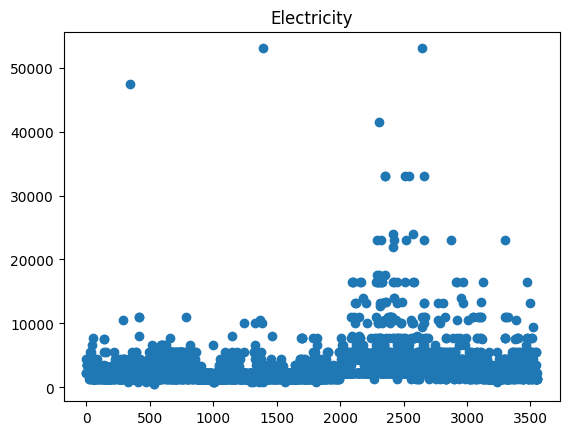

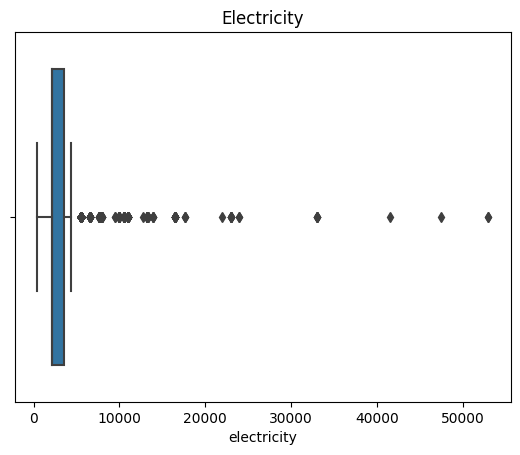

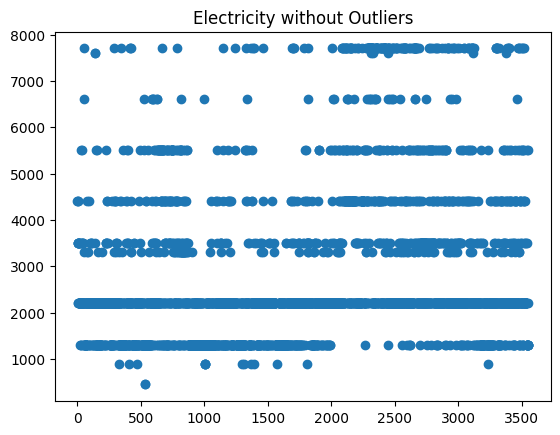

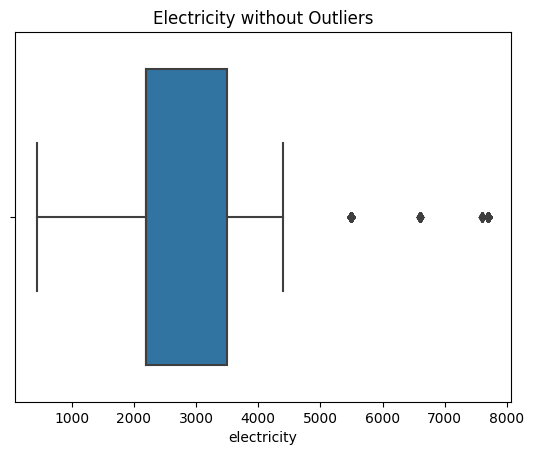

In [36]:
# visualisasi scatter untuk menampilkan data outliers
plt.scatter(df.electricity.index, df.electricity)
plt.title('Electricity')
plt.show()

# visualisasi boxplot untuk menampilkan data outliers
sns.boxplot(x=df.electricity)
plt.title('Electricity')
plt.show()

# memotong data outliers dengan metode winsorize
import scipy
from scipy.stats.mstats import winsorize
df.electricity = winsorize(df.electricity,(0.00,0.05),inplace=True)

# visualisasi scatter untuk menampilkan data outliers setelah dibersihkan
plt.scatter(df.electricity.index,df.electricity)
plt.title('Electricity without Outliers')
plt.show()

# visualisasi boxplot untuk menampilkan data outliers setelah dibersihkan
sns.boxplot(x= df.electricity)
plt.title('Electricity without Outliers')
plt.show()

In [37]:
# menampilkan ringkasan statistik maid_bedrooms
df.maid_bedrooms.describe()

count    3553.000000
mean        0.496482
std         0.685723
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         7.000000
Name: maid_bedrooms, dtype: float64

In [38]:
def calculate_percentiles(data):
    # menghitung persentil ke-5 dan ke-95 menggunakan numpy
    percentile_5 = np.percentile(data, 5)
    percentile_95 = np.percentile(data, 95)
    return percentile_5, percentile_95

# memilih data yang ingin dilihat nilai p5 dan p95
data = df['maid_bedrooms']
p5, p95 = calculate_percentiles(data)

# menampilkan hasil persentil ke-5 dan ke-95
print("Persentil 5: ", p5)
print("Persentil 95: ", p95)

Persentil 5:  0.0
Persentil 95:  2.0


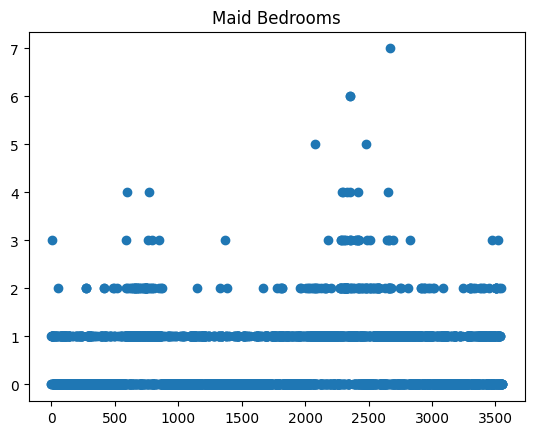

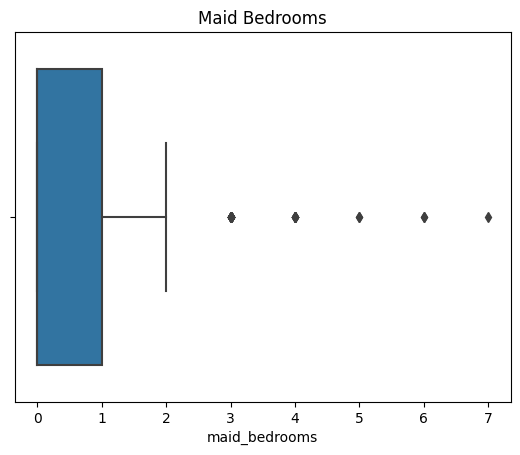

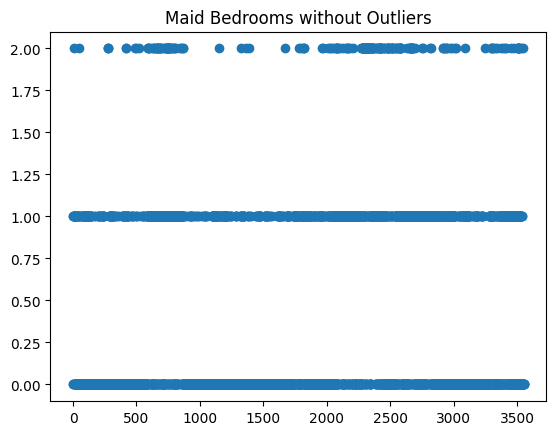

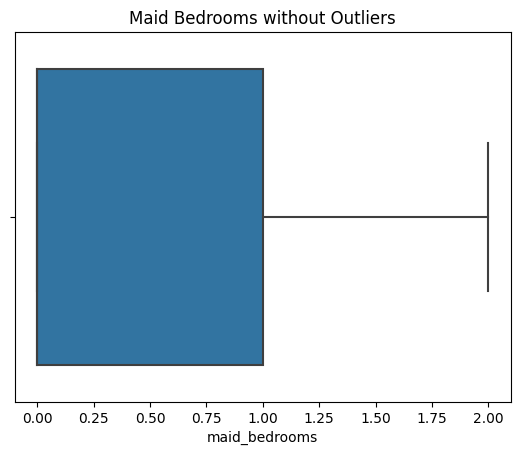

In [39]:
# visualisasi scatter untuk menampilkan data outliers
plt.scatter(df.maid_bedrooms.index, df.maid_bedrooms)
plt.title('Maid Bedrooms')
plt.show()

# visualisasi boxplot untuk menampilkan data outliers
sns.boxplot(x=df.maid_bedrooms)
plt.title('Maid Bedrooms')
plt.show()

# memotong data outliers dengan metode winsorize
import scipy
from scipy.stats.mstats import winsorize
df.maid_bedrooms = winsorize(df.maid_bedrooms,(0.00,0.05),inplace=True)

# visualisasi scatter untuk menampilkan data outliers setelah dibersihkan
plt.scatter(df.maid_bedrooms.index,df.maid_bedrooms)
plt.title('Maid Bedrooms without Outliers')
plt.show()

# visualisasi boxplot untuk menampilkan data outliers setelah dibersihkan
sns.boxplot(x= df.maid_bedrooms)
plt.title('Maid Bedrooms without Outliers')
plt.show()

In [40]:
# menampilkan ringkasan statistik maid_bathrooms
df.maid_bathrooms.describe()

count    3553.000000
mean        0.370391
std         0.536024
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: maid_bathrooms, dtype: float64

In [41]:
def calculate_percentiles(data):
    # menghitung persentil ke-5 dan ke-95 menggunakan numpy
    percentile_5 = np.percentile(data, 5)
    percentile_95 = np.percentile(data, 95)
    return percentile_5, percentile_95

# memilih data yang ingin dilihat nilai p5 dan p95
data = df['maid_bathrooms']
p5, p95 = calculate_percentiles(data)

# menampilkan hasil persentil ke-5 dan ke-95
print("Persentil 5: ", p5)
print("Persentil 95: ", p95)

Persentil 5:  0.0
Persentil 95:  1.0


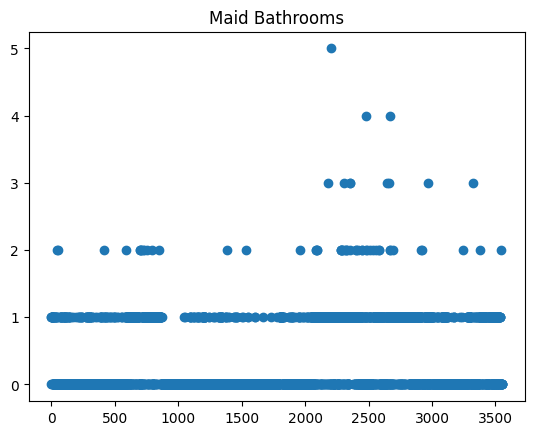

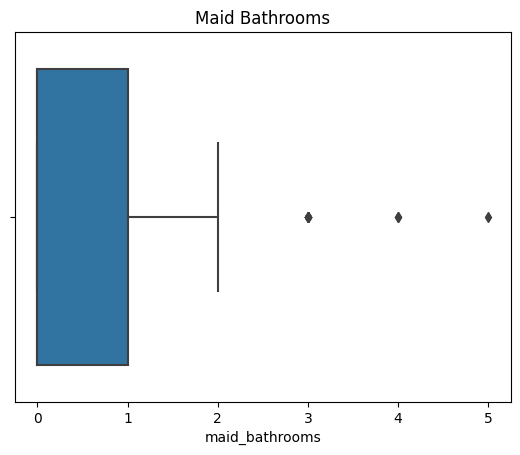

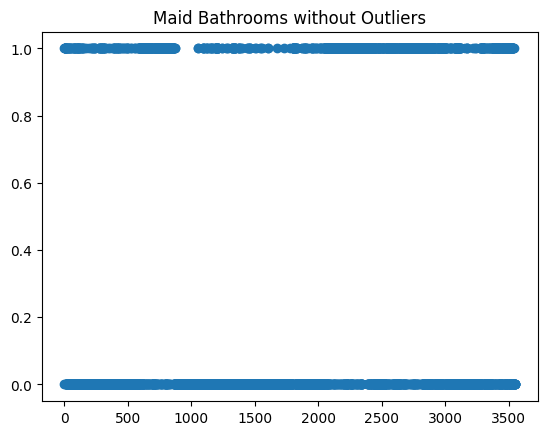

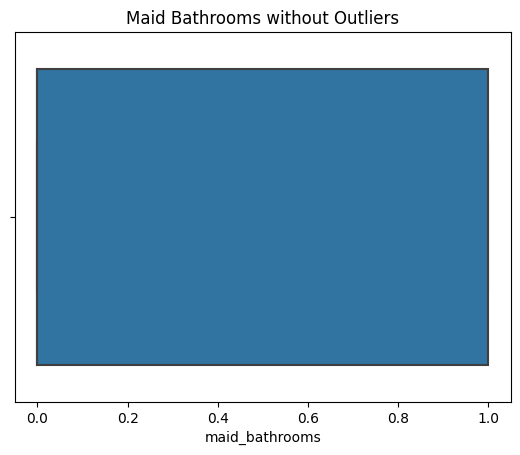

In [42]:
# visualisasi scatter untuk menampilkan data outliers
plt.scatter(df.maid_bathrooms.index, df.maid_bathrooms)
plt.title('Maid Bathrooms')
plt.show()

# visualisasi boxplot untuk menampilkan data outliers
sns.boxplot(x=df.maid_bathrooms)
plt.title('Maid Bathrooms')
plt.show()

# memotong data outliers dengan metode winsorize
import scipy
from scipy.stats.mstats import winsorize
df.maid_bathrooms = winsorize(df.maid_bathrooms,(0.00,0.05),inplace=True)

# visualisasi scatter untuk menampilkan data outliers setelah dibersihkan
plt.scatter(df.maid_bathrooms.index,df.maid_bathrooms)
plt.title('Maid Bathrooms without Outliers')
plt.show()

# visualisasi boxplot untuk menampilkan data outliers setelah dibersihkan
sns.boxplot(x= df.maid_bathrooms)
plt.title('Maid Bathrooms without Outliers')
plt.show()

In [43]:
# menampilkan ringkasan statistik floors
df.floors.describe()

count    3553.000000
mean        1.764987
std         0.636884
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: floors, dtype: float64

In [44]:
def calculate_percentiles(data):
    # menghitung persentil ke-5 dan ke-95 menggunakan numpy
    percentile_5 = np.percentile(data, 5)
    percentile_95 = np.percentile(data, 95)
    return percentile_5, percentile_95

# memilih data yang ingin dilihat nilai p5 dan p95
data = df['floors']
p5, p95 = calculate_percentiles(data)

# menampilkan hasil persentil ke-5 dan ke-95
print("Persentil 5: ", p5)
print("Persentil 95: ", p95)

Persentil 5:  1.0
Persentil 95:  3.0


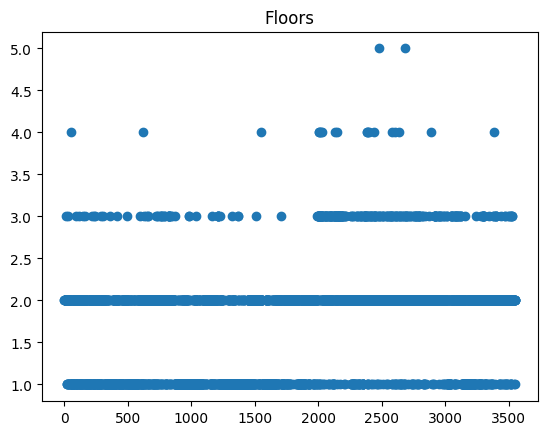

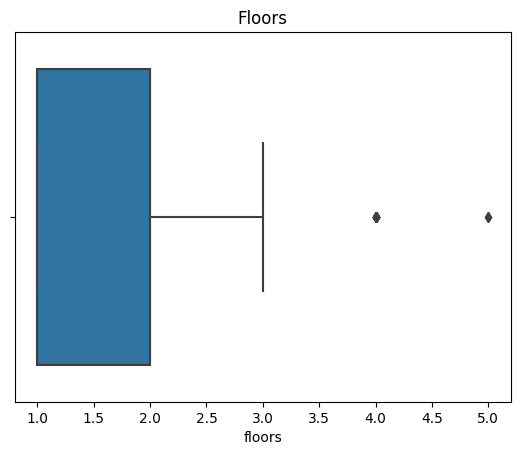

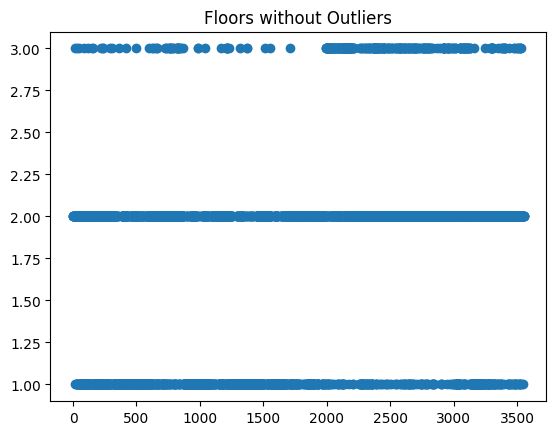

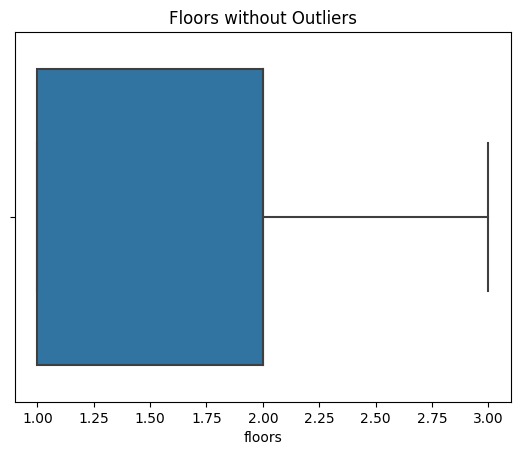

In [45]:
# visualisasi scatter untuk menampilkan data outliers
plt.scatter(df.floors.index, df.floors)
plt.title('Floors')
plt.show()

# visualisasi boxplot untuk menampilkan data outliers
sns.boxplot(x=df.floors)
plt.title('Floors')
plt.show()

# memotong data outliers dengan metode winsorize
import scipy
from scipy.stats.mstats import winsorize
df.floors = winsorize(df.floors,(0.00,0.05),inplace=True)

# visualisasi scatter untuk menampilkan data outliers setelah dibersihkan
plt.scatter(df.floors.index,df.floors)
plt.title('Floors without Outliers')
plt.show()

# visualisasi boxplot untuk menampilkan data outliers setelah dibersihkan
sns.boxplot(x= df.floors)
plt.title('Floors without Outliers')
plt.show()

In [46]:
# menampilkan ringkasan statistik garages
df.garages.describe()

count    3553.000000
mean        0.708978
std         1.311879
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        50.000000
Name: garages, dtype: float64

In [47]:
def calculate_percentiles(data):
    # menghitung persentil ke-5 dan ke-95 menggunakan numpy
    percentile_5 = np.percentile(data, 5)
    percentile_95 = np.percentile(data, 95)
    return percentile_5, percentile_95

# memilih data yang ingin dilihat nilai p5 dan p95
data = df['garages']
p5, p95 = calculate_percentiles(data)

# menampilkan hasil persentil ke-5 dan ke-95
print("Persentil 5: ", p5)
print("Persentil 95: ", p95)

Persentil 5:  0.0
Persentil 95:  2.0


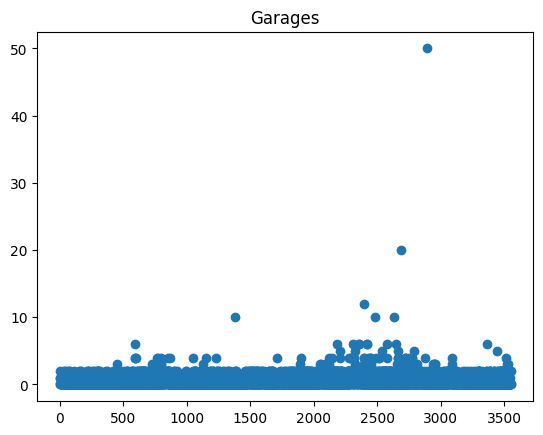

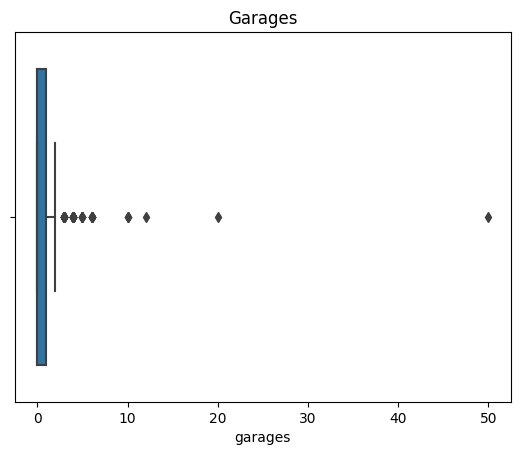

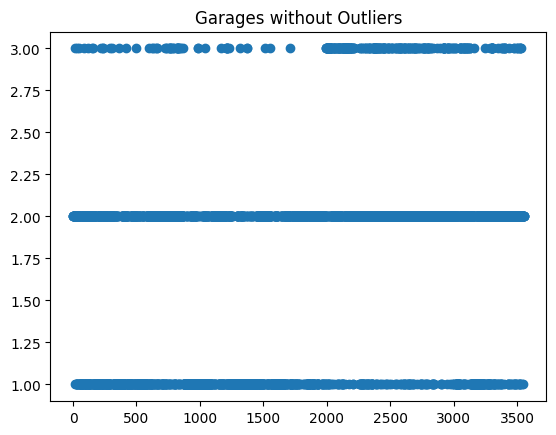

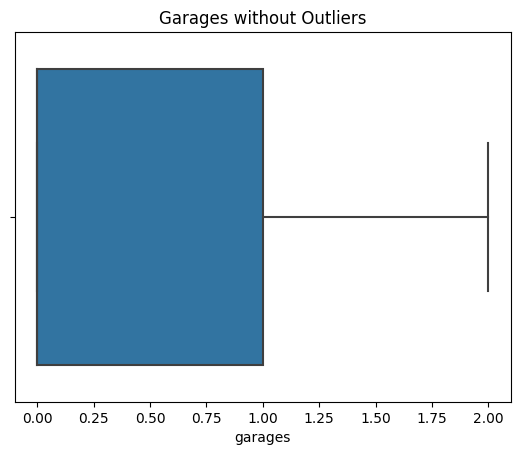

In [48]:
# visualisasi scatter untuk menampilkan data outliers
plt.scatter(df.garages.index, df.garages)
plt.title('Garages')
plt.show()

# visualisasi boxplot untuk menampilkan data outliers
sns.boxplot(x=df.garages)
plt.title('Garages')
plt.show()

# memotong data outliers dengan metode winsorize
import scipy
from scipy.stats.mstats import winsorize
df.garages = winsorize(df.garages,(0.00,0.05),inplace=True)

# visualisasi scatter untuk menampilkan data outliers setelah dibersihkan
plt.scatter(df.garages.index,df.floors)
plt.title('Garages without Outliers')
plt.show()

# visualisasi boxplot untuk menampilkan data outliers setelah dibersihkan
sns.boxplot(x= df.garages)
plt.title('Garages without Outliers')
plt.show()

# VISUALISASI

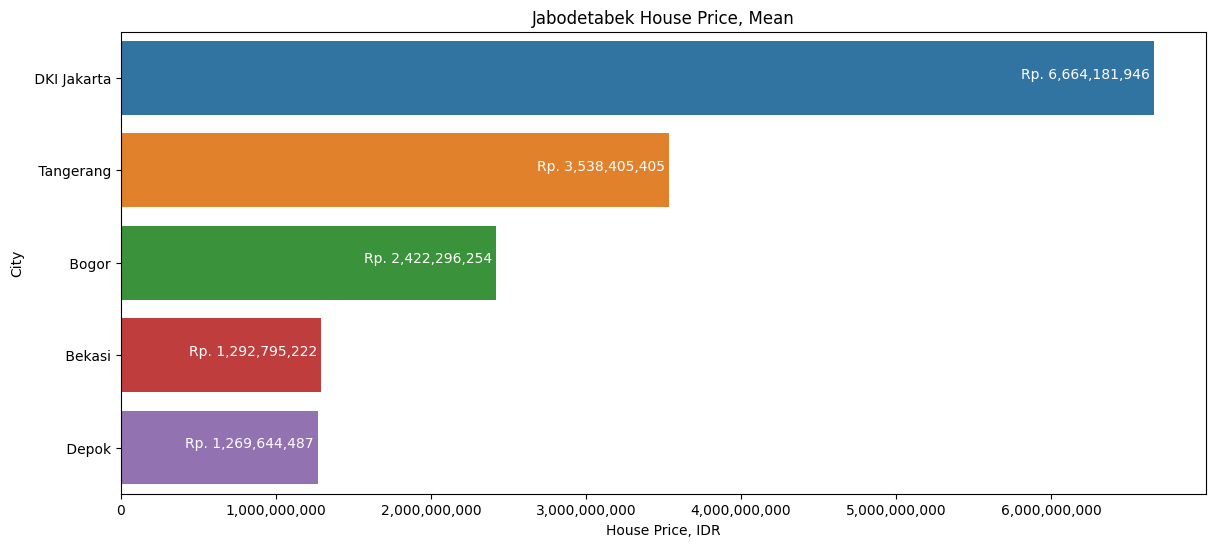

In [49]:
# menampilkan 5 kota dengan harga rumah tertinggi
df_simple = df.copy()
df_simple.loc[df_simple.city.str.contains('Jakarta'), 'city'] = ' DKI Jakarta'
mean = df_simple[['city', 'price_in_rp']]\
    .groupby('city')\
    .aggregate(np.mean)\
    .reset_index()\
    .sort_values('price_in_rp', ascending=False)
# plot_order = list(median.sort_values('price_in_rp', ascending=False).city)
plt.figure(figsize=(14, 6))
sns.barplot(y='city', x='price_in_rp',data=mean)
for y, x in enumerate(mean.price_in_rp):
    plt.text(x=x, y=y, s=f'Rp. {x:,.0f} ', ha='right', color='white')
# Bar Chart Rata-rata Harga Rumah di Jabodetabek
plt.title('Jabodetabek House Price, Mean')
plt.xlabel('House Price, IDR')
plt.ylabel('City')
current_xticks = plt.xticks()[0][:-1]
plt.xticks(current_xticks, ['{:,.0f}'.format(x) for x in current_xticks])
plt.show()

Berdaasarkan gambar diatas, dapat dilihat bahwa rata-rata harga rumah tertinggi terdapat pada wilayah DKI Jakarta, sedangkan untuk rata-rata harga rumah terendah terdapat pada wilayah Depok. Tingginya harga rumah di DKI Jakarta disebabkan karena beberapa faktor, diantaranya keterbatasan lahan (populasi banyak), permintaan yang tinggi (Jakarta adalah pusat ekonomi, politik, dan sosial Indonesia), infrastruktur dan aksesibilitas yang baik.

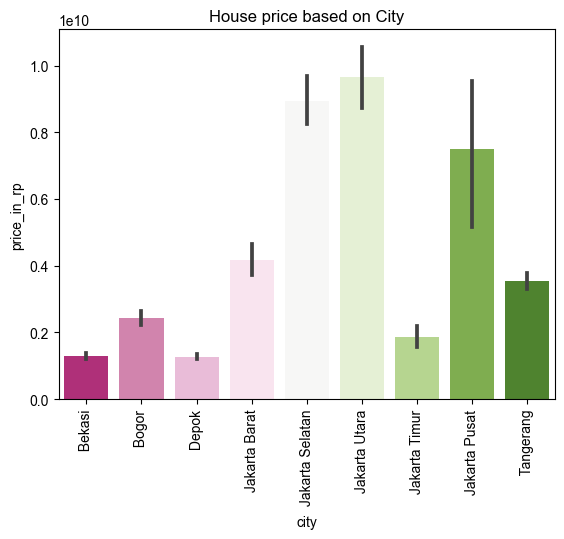

In [50]:
# Harga Rumah vs Wilayah
sns.barplot(x="city", y="price_in_rp", data=df, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(6, 6)})
plt.title("House price based on City")
plt.show()

Harga Rumah tertinggi terdapat pada wilayah Jakarta Utara, sedangkan harga rumah terendah terdapat pada wilayah Depok

In [51]:
# menampilkan distribusi harga rumah Jabodetabek dalam bentuk visualisasi peta
median_df = \
    df\
        .groupby('district')\
        .agg(median_price=('price_in_rp', np.median), 
             unit_count=('price_in_rp', np.count_nonzero),
             median_size=('building_size_m2', np.median)
            )\
        .reset_index()\
        .merge(df[['district','city', 'lat', 'long']].drop_duplicates(subset=['district']), on='district')\
        .sort_values('city')
hover_data = {
    'district': True,
    'city': True,
    'lat': False,
    'long': False,
    'median_price': ':,.0f',
    'median_size': ':,.0f',
    'unit_count': True,
    }    
fig = px.scatter_mapbox(
    median_df, lat='lat', lon='long', 
    color='city', size=(median_df.median_price / 10e3),
    hover_data=hover_data, hover_name='district', 
    )
fig.update_layout(
    title='Jabodetabek House Price Map',
    mapbox_style="carto-darkmatter",            
    autosize=True,
    hovermode='closest', 
    )
fig.show(renderer='iframe')

Berdasarkan visualisasi peta di atas, harga rumah dapat dilihat berdasarkan ukuran titik pada suatu lokasi. Semakin besar titik pada suatu lokasi, maka semakin besar harga rumah pada lokasi tersebut. Contoh: Kemang vs Tanah Sareal.

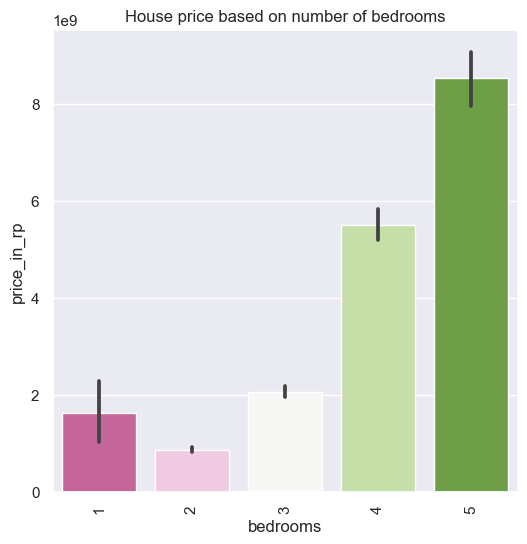

In [52]:
# Harga Rumah vs Jumlah Kamar Tidur
sns.barplot(x="bedrooms", y="price_in_rp", data=df, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(6, 6)})
plt.title("House price based on number of bedrooms")
plt.show()

Semakin banyak jumlah kamar tidur, maka harga rumah juga semakin tinggi

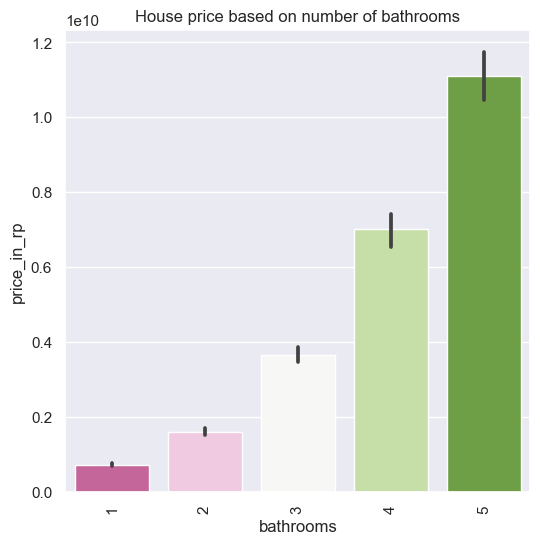

In [53]:
# Harga Rumah vs Jumlah Kamar Mandi
sns.barplot(x="bathrooms", y="price_in_rp", data=df, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(6, 6)})
plt.title("House price based on number of bathrooms")
plt.show()

Dari gambar diatas, dapat dilihat bahwa semakin banyak jumlah kamar mandi pada suatu rumah, maka harga rumah juga akan semakin tinggi

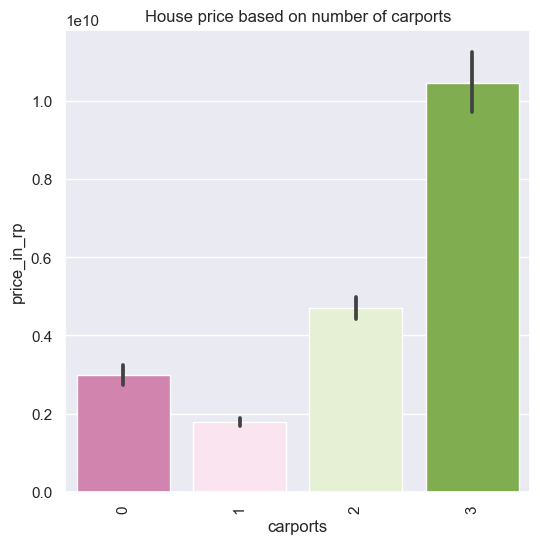

In [54]:
# Harga Rumah vs Jumlah Carport
sns.barplot(x="carports", y="price_in_rp", data=df, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(6, 6)})
plt.title("House price based on number of carports")
plt.show()

Semakin bertambah jumlah carport, maka harga rumah juga meningkat. Namun carport bukanlah satu-satunya faktor yang mempengaruhi harga suatu rumah. Terdapat faktor lainnya, seperti muatan listrik, luas lahan dan bangunan, wilayah, dan lain sebagainya

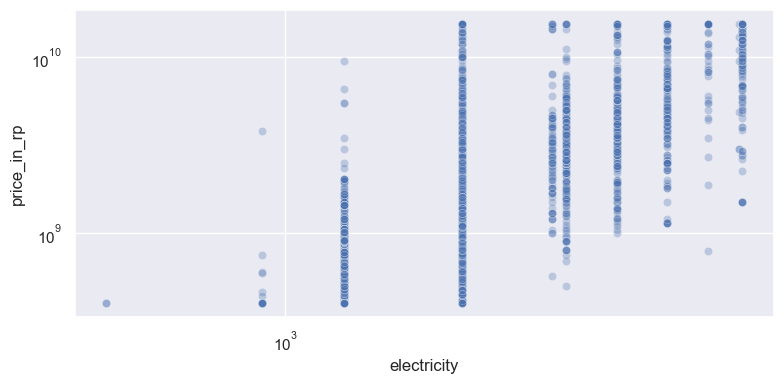

In [55]:
# Harga Rumah vs Muatan Listrik
data = ['electricity']
fig, ax = plt.subplots(1, figsize=(8, 4))

for (ax_index, ax_), feature in zip(np.ndenumerate(ax), data):
    sns.scatterplot(data=df, x=feature, y='price_in_rp', alpha=0.3, ax=ax_)
    ax_.set_xscale('log')
    ax_.set_yscale('log')

plt.tight_layout()
plt.show()

Semakin tinggi muatan listrik suatu rumah maka harganya juga akan semakin tinggi. Namun, selain jumlah muatan listrik, terdapat faktor lain penentu tinggi rendahnya suatu rumah, seperti jumlah kamar, kamar mandi, carport, luas bangunan, dan lain sebagainya.

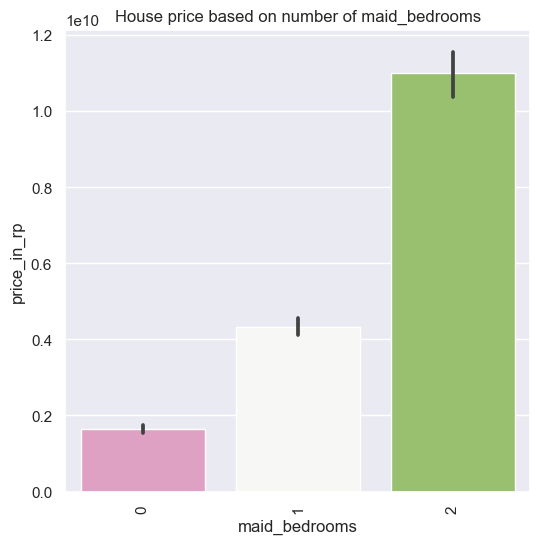

In [56]:
# Harga Rumah vs Jumlah Kamar ART
sns.barplot(x="maid_bedrooms", y="price_in_rp", data=df, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(6, 6)})
plt.title("House price based on number of maid_bedrooms")
plt.show()

Dari gambar diatas, dapat dilihat bahwa semakin banyak jumlah kamar ART pada suatu rumah, maka harga rumah juga akan semakin tinggi

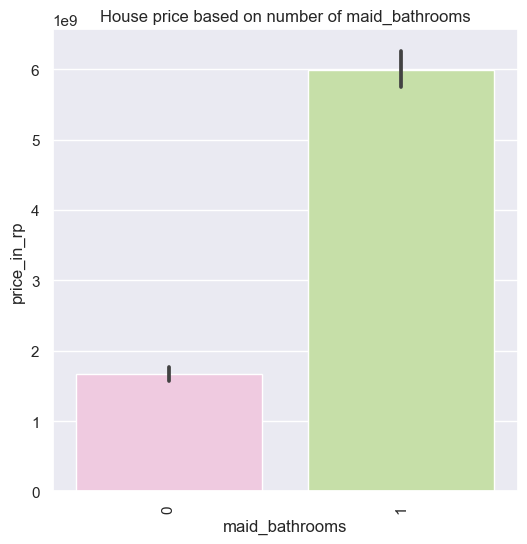

In [57]:
# Harga Rumah vs Jumlah Kamar ART
sns.barplot(x="maid_bathrooms", y="price_in_rp", data=df, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(6, 6)})
plt.title("House price based on number of maid_bathrooms")
plt.show()

Dari gambar diatas, dapat dilihat bahwa semakin banyak jumlah kamar mandi ART pada suatu rumah, maka harga rumah juga akan semakin tinggi

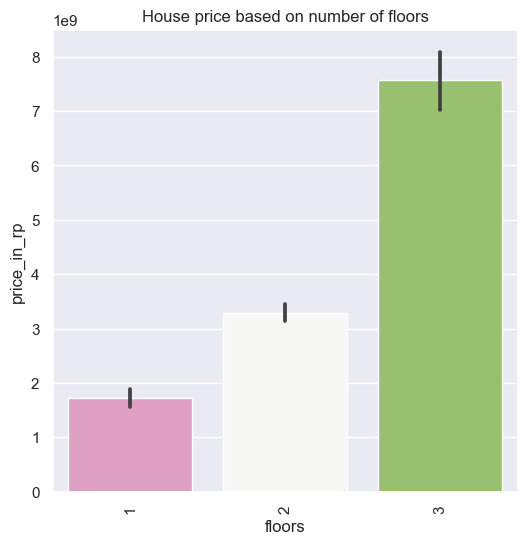

In [58]:
# Harga Rumah vs Jumlah Lantai Rumah
sns.barplot(x="floors", y="price_in_rp", data=df, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(6, 6)})
plt.title("House price based on number of floors")
plt.show()

Berdasarkan gambar diatas dapat dilihat bahwa semakin banyak jumlah lantai sebuah rumah, maka harga rumah juga akan semakin tinggi

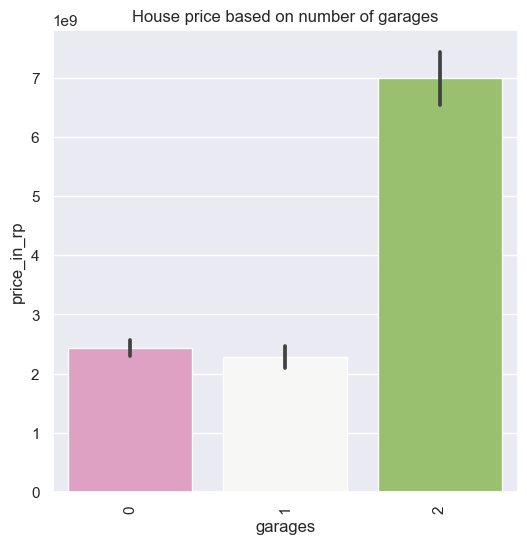

In [59]:
# Harga Rumah vs Jumlah Garasi
sns.barplot(x="garages", y="price_in_rp", data=df, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(6, 6)})
plt.title("House price based on number of garages")
plt.show()

Semakin banyak garasi pada suatu rumah maka harganya juga akan semakin tinggi. Namun, selain jumlah garasi, terdapat faktor lain penentu tinggi rendahnya suatu rumah, seperti jumlah kamar, kamar mandi, carport, luas bangunan, dan lain sebagainya.

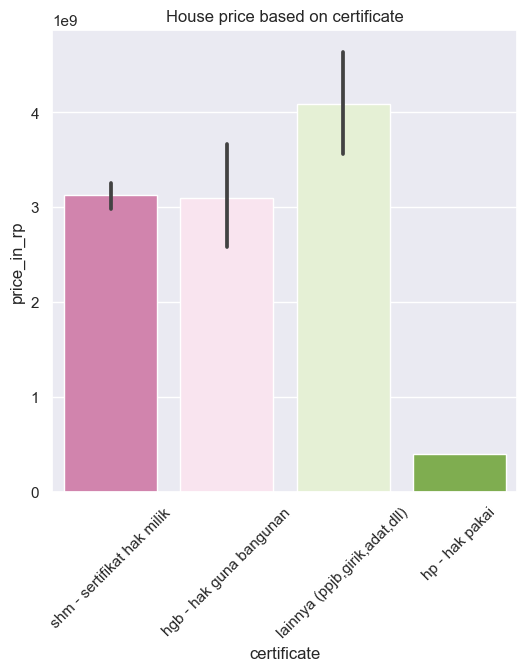

In [60]:
# harga Rumah vs Tipe Sertifikat
sns.barplot(x="certificate", y="price_in_rp", data=df, palette="PiYG")
plt.xticks(rotation=45)
sns.set(rc={"figure.figsize":(6, 6)})
plt.title("House price based on certificate")
plt.show()

Harga rumah tertinggi terdapat pada rumah dengan tipe sertifikat lainnya (ppjb, girik, adat, dll), sedangkan harga rumah terendah terdapat pada rumah dengan sertifikat hak pakai. Tingginya harga rumah pada tipe sertifikat lainnya disebabkan karena beberapa faktor, diantaranya legalitas, biaya proses hukum yang tinggi, nilai investasi, dan lain-lain. Rendahnya harga rumah dengan sertifikat hak pakai dapat disebabkan karena beberapa faktor, seperti keterbatasan hak pakai, masa berlaku terbatas, dan jumlah permintaan yang rendah

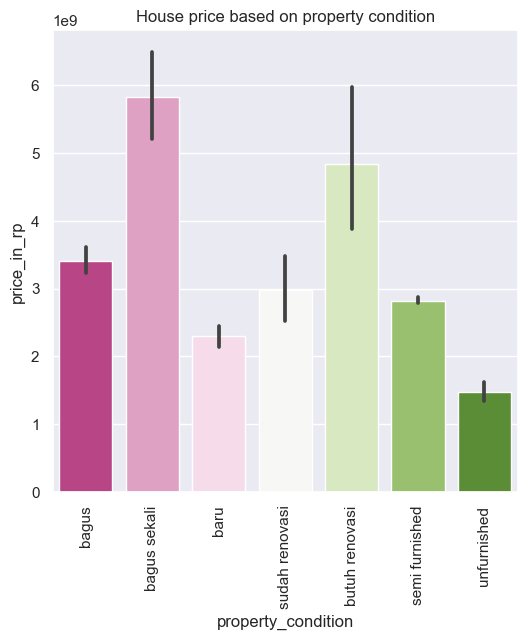

In [61]:
# Harga Rumah vs Kondisi Properti
sns.barplot(x="property_condition", y="price_in_rp", data=df, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(6, 6)})
plt.title("House price based on property condition")
plt.show()

Berdasarkan gambar di atas, dapat dilihat bahwa harga rumah tertinggi berada pada rumah dengan kondisi bagus sekali, sedangkan harga rumah terendah berada pada rumah dengan kondisi baru.

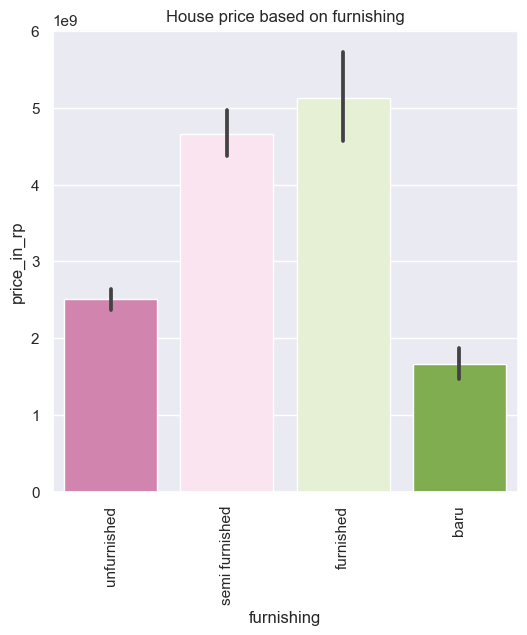

In [62]:
# Harga Rumah vs Kelengkapan Perabotan
sns.barplot(x="furnishing", y="price_in_rp", data=df, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(6, 6)})
plt.title("House price based on furnishing")
plt.show()

Terdapat 4 jenis rumah berdasarkan kelengkapan perabotan, diantaranya unfurnished (tidak ada perabotan), semi furnished (tersedia sebagian perabotan), furnished (perabotan sudah ada), dan baru (belum pernah ditempati). Berdasarkan gambar di atas, dapat dilihat bahwa harga rumah tertinggi dan terendah terdapat pada rumah furnished dan rumah baru.

# PREPROCESSING DATA 2

In [63]:
# Encode kolom city dan kolom district
df['city'] = df['city'].astype('category')
df['city'] = df['city'].cat.codes
df['district'] = df['district'].astype('category')
df['district'] = df['district'].cat.codes
# diperlukan untuk memasukkan data city dan district ke dalam permodelan

In [64]:
# Memuat Data Numerikal (Kolom Lat & Long dihapus)
numerical_data = df.select_dtypes(exclude=['object']).drop(columns=['lat','long'])
numerical_data

,price_in_rp,district,city,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,electricity,maid_bedrooms,maid_bathrooms,floors,garages
0,2.990000e+09,343,0,4,4,239.0,272.0,0,4400,0,1,2,0
1,1.270000e+09,343,0,3,2,55.0,69.0,1,2200,0,0,2,0
2,1.950000e+09,343,0,3,3,119.0,131.0,1,2200,1,1,2,1
3,3.300000e+09,343,0,3,3,180.0,174.0,0,3500,1,1,2,2
4,4.500000e+09,343,0,4,3,328.0,196.0,2,3500,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,5.880000e+08,189,8,2,1,72.0,36.0,1,1300,0,0,1,1
3549,7.850000e+08,231,8,3,2,85.0,60.0,1,1300,0,0,2,0
3550,7.550000e+08,231,8,3,2,78.0,60.0,1,1300,0,0,2,0
3551,8.000000e+08,21,8,3,2,60.0,65.0,2,2200,0,0,2,0


<Axes: >

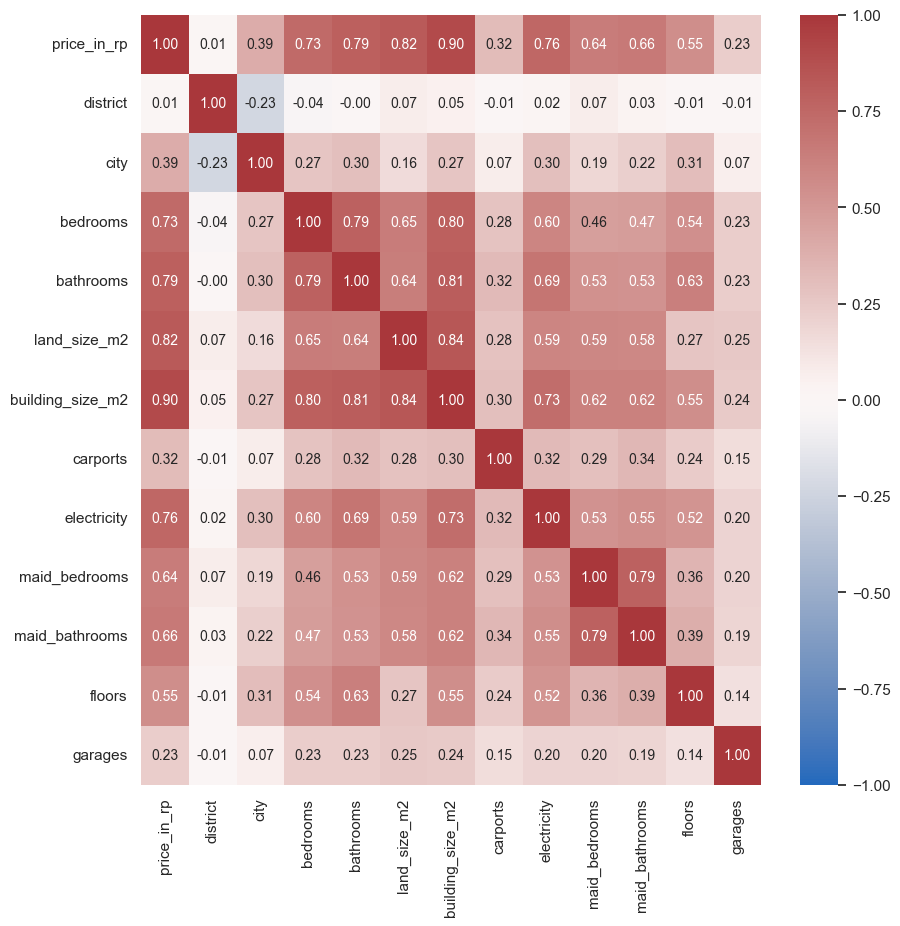

In [65]:
# Membuat Heatmap (melihat korelasi antar variabel)
plt.figure(figsize=(10,10))
correlation = numerical_data.corr(method='spearman')
sns.heatmap(correlation, vmin=-1, vmax=1, center=0, cmap='vlag', annot=True, fmt='.2f', annot_kws={'size': 10})

Terlihat bahwa variabel price_in_rp berkorelasi kuat dengan variabel building_size_m2 (0.90) dan land_size_m2(0.82). Hal ini terlihat dari nilai korelasinya yang mendekati angka 1. Semakin nilai korelasinya mendekati angka 1, maka korelasi antar variabelnya juga akan semakin tinggi.

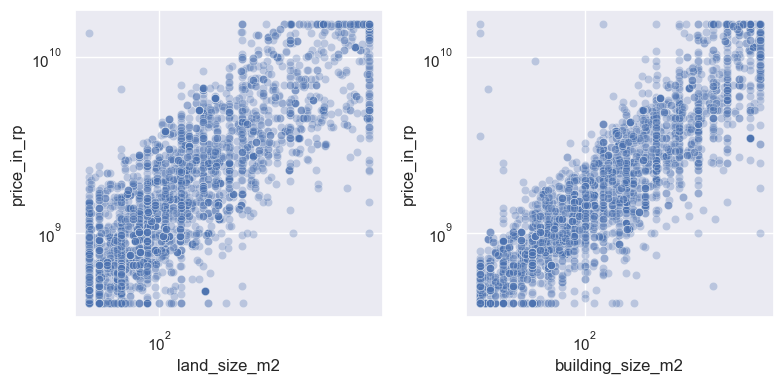

In [66]:
#Membuat Scatter Plot (Korelasi Harga Rumah dengan Luas Lahan & Bangunan)
data = ['land_size_m2', 'building_size_m2']
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

for (ax_index, ax_), feature in zip(np.ndenumerate(ax), data):
    sns.scatterplot(data=df, x=feature, y='price_in_rp', alpha=0.3, ax=ax_)
    ax_.set_xscale('log')
    ax_.set_yscale('log')

plt.tight_layout()
plt.show()


Dari kedua gambar diatas, pola korelasi yang terbentuk adalah garis lurus (linear positif). Pola linear menunjukkan bahwa antar variabel(x,y) memiliki hubungan yang erat. Linear positif memiliki arti bahwa jika salah satu variabel meningkat/naik, maka variabel yang lain juga akan meningkat. Seperti gambar diatas, jika luas lahan atau bangunan bertambah, maka harga rumah juga akan meningkat.

# MODELLING
Menggunakan 3 machine learning, yaitu Linear Regression, XGBoost Regression, dan K-Nearest Neighboars Regression

In [67]:
# import libraries dasar untuk modelling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import metrics

### Linear Regression

In [68]:
# Import libraries untuk machine learning Linear Regression
from sklearn.linear_model import LinearRegression

# Splitting data
X = numerical_data.drop("price_in_rp", axis=1)
y = numerical_data["price_in_rp"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [69]:
# Instantiation
lin_reg = LinearRegression()

# Fitting the model
lin_reg.fit(X_train, y_train)

print('lin_reg.intercept_',lin_reg.intercept_)

lin_reg.intercept_ -1638631027.4147902


In [70]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
district,-1.825525e+05
city,1.631294e+08
bedrooms,-2.929449e+08
bathrooms,9.163683e+07
land_size_m2,9.813189e+06
building_size_m2,1.229626e+07
carports,1.413877e+08
electricity,2.555027e+05
maid_bedrooms,3.347489e+08
maid_bathrooms,-2.890301e+08


In [71]:
#Model evaluation
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

# Predict the model
pred_test = lin_reg.predict(X_test)
pred_train = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, pred_test)

#results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, pred_test) , cross_val(LinearRegression())]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 1089466440.0313442
MSE: 2.711075337086973e+18
RMSE: 1646534341.3020492
R2 Square 0.8362611732802496
__________________________________


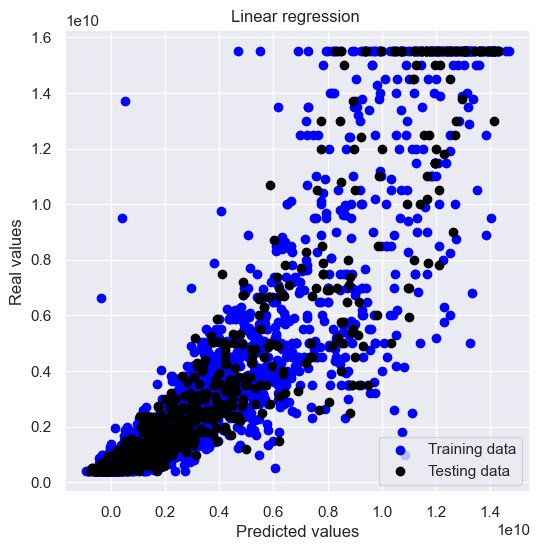

In [72]:
pred_test = lin_reg.predict(X_test)
pred_train = lin_reg.predict(X_train)

plt.scatter(pred_train, y_train, c = "blue",  label = "Training data")
plt.scatter(pred_test, y_test, c = "black",  label = "Testing data")
plt.title("Linear regression ")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "lower right")
plt.show()

### XGBoost Regression

In [73]:
# Import libraries untuk machine learning XGBoost Regression
import xgboost as xg

# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)

# Fitting the model
xgb_r.fit(X_train, y_train)

# Predict the model
pred_test = xgb_r.predict(X_test)
pred_train = xgb_r.predict(X_train)

#Model evaluation
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, pred_test)

[08:36:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Test set evaluation:
_____________________________________
MAE: 703580736.0
MSE: 1.7736417065117617e+18
RMSE: 1331781403.4261634
R2 Square 0.8928786640221149
__________________________________


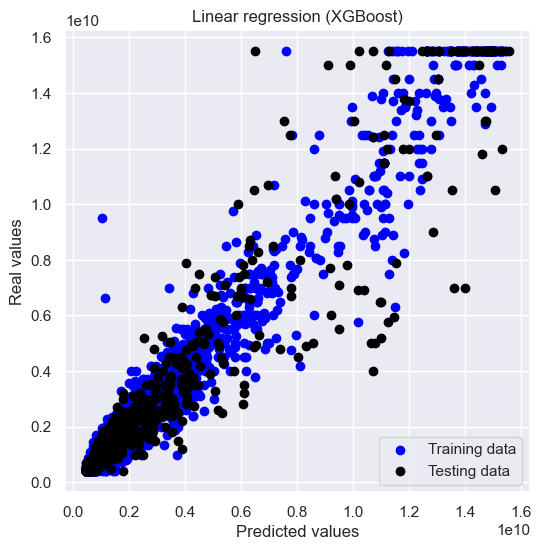

In [74]:
pred_test = xgb_r.predict(X_test)
pred_train = xgb_r.predict(X_train)

# Plot the regression line with actual data point
plt.scatter(pred_train, y_train, c = "blue",  label = "Training data")
plt.scatter(pred_test, y_test, c = "black",  label = "Testing data")
plt.title("Linear regression (XGBoost)")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "lower right")
plt.show()


### K-Nearest Neighboars Regression

In [75]:
# Import libraries untuk machine learning K-Nearest Neighboars Regression
from sklearn.neighbors import KNeighborsRegressor

# Initiation
knn_model = KNeighborsRegressor(n_neighbors=5)
# Fitting the model
knn_model.fit(X_train, y_train)

# Predict the model
pred_test = knn_model.predict(X_test)
pred_train = knn_model.predict(X_train)

#Model evaluation
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

print('KNN Algorithm Test set evaluation:\n_____________________________________')
print_evaluate(y_test, pred_test)

KNN Algorithm Test set evaluation:
_____________________________________
MAE: 858598030.9423348
MSE: 2.660863518987342e+18
RMSE: 1631215350.2794602
R2 Square 0.839293779593556
__________________________________


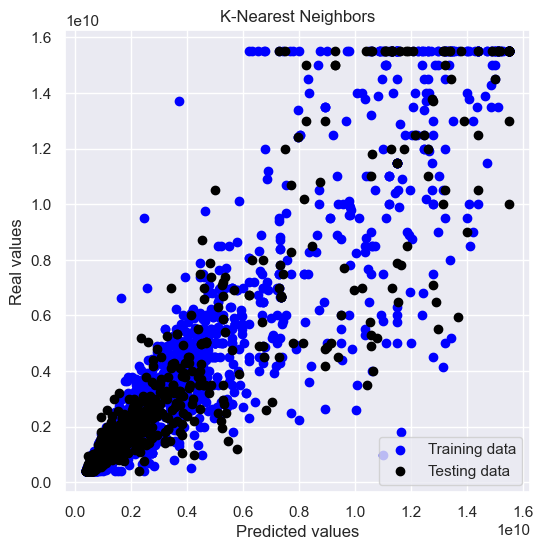

In [76]:
# Plot the regression line with actual data point
plt.scatter(pred_train, y_train, c = "blue",  label = "Training data")
plt.scatter(pred_test, y_test, c = "black",  label = "Testing data")
plt.title("K-Nearest Neighbors")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "lower right")
plt.show()

# UJI MODEL
Pengujian model yang telah dibuat menggunkan data baru

In [77]:
# menampilkan data baru
data_uji = pd.read_csv('data_uji.csv')
data_uji.head()

,district,city,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,electricity,maid_bedrooms,maid_bathrooms,floors,garages
0,343,0,2,3,91.0,120.0,2,2200,0,0,2,0
1,42,0,4,3,100.0,136.0,2,2200,1,1,2,2
2,29,8,3,2,60.0,78.0,1,5500,0,0,2,0
3,158,0,3,2,66.0,87.0,1,2200,0,0,2,1
4,44,0,3,3,77.0,150.0,1,3300,0,0,3,0


In [78]:
# menampilkan info dari data baru
data_uji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   district          20 non-null     int64  
 1   city              20 non-null     int64  
 2   bedrooms          20 non-null     int64  
 3   bathrooms         20 non-null     int64  
 4   land_size_m2      20 non-null     float64
 5   building_size_m2  20 non-null     float64
 6   carports          20 non-null     int64  
 7   electricity       20 non-null     int64  
 8   maid_bedrooms     20 non-null     int64  
 9   maid_bathrooms    20 non-null     int64  
 10  floors            20 non-null     int64  
 11  garages           20 non-null     int64  
dtypes: float64(2), int64(10)
memory usage: 2.0 KB


In [79]:
# menampilkan prediksi harga data baru menggunakan machine learning Linear regression
preds_lin_reg = lin_reg.predict(data_uji)
preds_lin_reg

array([1.46559505e+09, 1.71234506e+09, 2.32448980e+09, 5.45748531e+08,
       1.73059586e+09, 1.19327876e+09, 4.67721418e+09, 1.84086374e+08,
       2.29350675e+09, 1.95830206e+09, 3.42375530e+09, 6.41622541e+08,
       8.62052584e+08, 4.85640320e+08, 1.25199835e+09, 3.45475718e+08,
       1.08077872e+10, 6.44517785e+08, 2.81913736e+08, 8.29582187e+09])

In [80]:
# menampilkan prediksi harga data baru menggunakan machine learning XGBoost Regression
preds_xgb_r = xgb_r.predict(data_uji)
preds_xgb_r

array([1.4101180e+09, 1.6247662e+09, 1.1226391e+09, 1.0387968e+09,
       1.2985513e+09, 1.2812567e+09, 3.2130570e+09, 8.4007923e+08,
       1.5974038e+09, 1.6515930e+09, 2.9420268e+09, 1.1301020e+09,
       1.0834697e+09, 9.8004768e+08, 1.1152739e+09, 1.0782935e+09,
       4.8478515e+09, 1.0102972e+09, 5.7713709e+08, 5.4919096e+09],
      dtype=float32)

In [81]:
# menampilkan prediksi harga data baru menggunakan machine learning K-Nearest Neighboars Regression
preds_knn_model = knn_model.predict(data_uji)
preds_knn_model

array([1.592e+09, 1.578e+09, 2.504e+09, 9.690e+08, 2.331e+09, 1.178e+09,
       2.830e+09, 9.520e+08, 1.560e+09, 1.682e+09, 3.612e+09, 1.300e+09,
       1.050e+09, 8.898e+08, 9.190e+08, 9.928e+08, 1.313e+10, 7.640e+08,
       8.068e+08, 7.020e+09])

In [82]:
# menggabungkan hasil prediksi harga dari 3 machine learning yang digunakan
compare = pd.DataFrame({
    'LinReg': preds_lin_reg,
    'XGBR' : preds_xgb_r,
    'KNN' : preds_knn_model
})
compare

,LinReg,XGBR,KNN
0,1.465595e+09,1.410118e+09,1.592000e+09
1,1.712345e+09,1.624766e+09,1.578000e+09
2,2.324490e+09,1.122639e+09,2.504000e+09
3,5.457485e+08,1.038797e+09,9.690000e+08
4,1.730596e+09,1.298551e+09,2.331000e+09
5,1.193279e+09,1.281257e+09,1.178000e+09
6,4.677214e+09,3.213057e+09,2.830000e+09
7,1.840864e+08,8.400792e+08,9.520000e+08
8,2.293507e+09,1.597404e+09,1.560000e+09
9,1.958302e+09,1.651593e+09,1.682000e+09


In [83]:
# menyimpan data compare menjadi data harga_data_uji dalam bentuk csv
compare.to_csv('harga_data_uji.csv', index=False)

In [84]:
# import libraries untuk menyimpan permodelan yang telah dibuat
import joblib

# menyimpan machine learning yang telah dibuat
joblib.dump(lin_reg, 'lin_reg_model_house_price.joblib')
joblib.dump(xgb_r, 'xgb_r_house_price.joblib')
joblib.dump(knn_model, 'knn_model_house_price.joblib');